In [28]:
import tiktoken
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={'<|endoftext|>'})

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]


def create_dataloader(txt, batch_size=4, max_length=256, stride=128, shuffle=True):
    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt,tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

    return dataloader


In [26]:
# Define the path to the file
file_path = 'verdict.txt'

# Open the file and read its contents
with open(file_path, 'r') as file:
    content = file.read()

# Print the content of the file
# print(content)
text = content[:2000]
print(text)


I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera. (Though I rather thought it would have been Rome or Florence.)

"The height of his glory"--that was what the women called it. I can hear Mrs. Gideon Thwing--his last Chicago sitter--deploring his unaccountable abdication. "Of course it's going to send the value of my picture 'way up; but I don't think of that, Mr. Rickham--the loss to Arrt is all I think of." The word, on Mrs. Thwing's lips, multiplied its _rs_ as though they were reflected in an endless vista of mirrors. And it was not only the Mrs. Thwings who mourned. Had not the exquisite Hermia Croft, at the last Grafton Gallery show, stopped me before Gisburn's "Moon-dancers" to say, with tears in her eyes: "We shall not look upon its like again"?

Well!--even through th

In [15]:
tokenizer = tiktoken.get_encoding("gpt2")
encoded_texxt = tokenizer.encode(text)
vacob_size = 5000
output_dim =256
max_len = 1024
context_len = max_len

token_embedding = nn.Embedding(vacob_size
                              
                              ,output_dim)
pos_embedding_layer = torch.nn.Embedding(context_len,output_dim)


Matplotlib is building the font cache; this may take a moment.


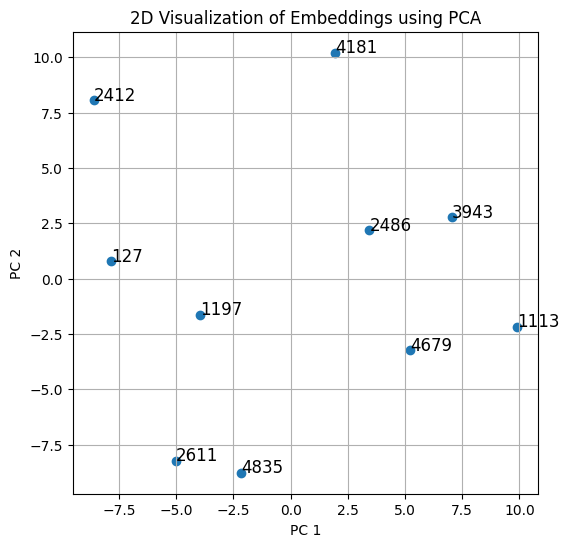

In [14]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define embedding layer
vocab_size = 5000  # Vocabulary size
embedding_dim = 256  # Embedding output dimension

embedding_layer = nn.Embedding(vocab_size, embedding_dim)

# Generate some random inputs (word indices)
inputs = torch.randint(0, vocab_size, (10,))  # For 10 random word indices
embeddings = embedding_layer(inputs)  # Get embeddings

# Convert to numpy for visualization
embeddings_np = embeddings.detach().numpy()

# Use PCA to reduce embedding dimension to 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_np)

# Plot the 2D embeddings
plt.figure(figsize=(6,6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

# Annotate each point with its word index
for i, word_index in enumerate(inputs):
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], str(word_index.item()), fontsize=12)

plt.title('2D Visualization of Embeddings using PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid(True)
plt.show()


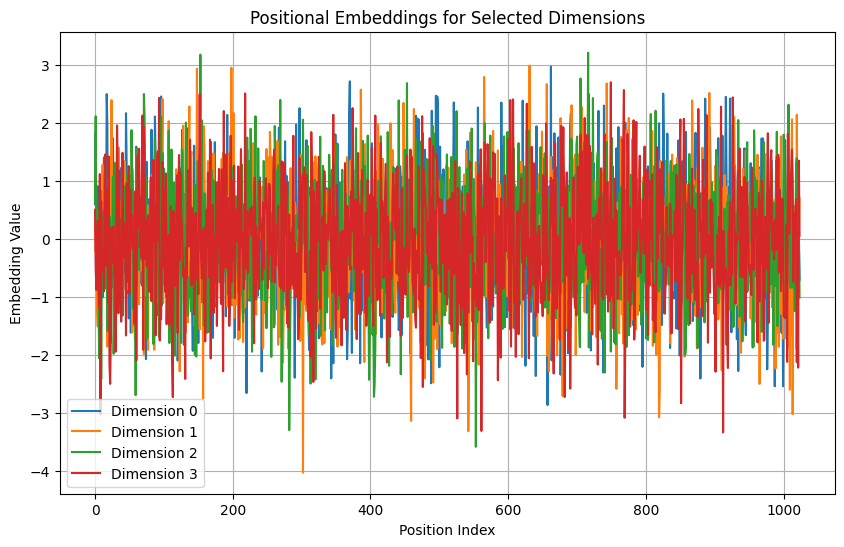

In [18]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Parameters for embedding
vocab_size = 5000
output_dim = 256  # Original embedding dimension
max_len = 1024  # Maximum context length
context_len = max_len

# Define positional embedding layer
pos_embedding_layer = nn.Embedding(context_len, output_dim)

# Get positional embeddings for each position in the context
positions = torch.arange(0, context_len)  # Positions from 0 to max_len
positional_embeddings = pos_embedding_layer(positions)  # Get positional embeddings

# Convert positional embeddings to numpy for visualization
positional_embeddings_np = positional_embeddings.detach().numpy()

# Select specific dimensions to plot
selected_dims = [0, 1, 2, 3]  # Choose the first 4 dimensions of the embeddings

# Plot the positional embeddings for selected dimensions
plt.figure(figsize=(10, 6))

for dim in selected_dims:
    plt.plot(positions.numpy(), positional_embeddings_np[:, dim], label=f'Dimension {dim}')

plt.title('Positional Embeddings for Selected Dimensions')
plt.xlabel('Position Index')
plt.ylabel('Embedding Value')
plt.legend()
plt.grid(True)
plt.show()


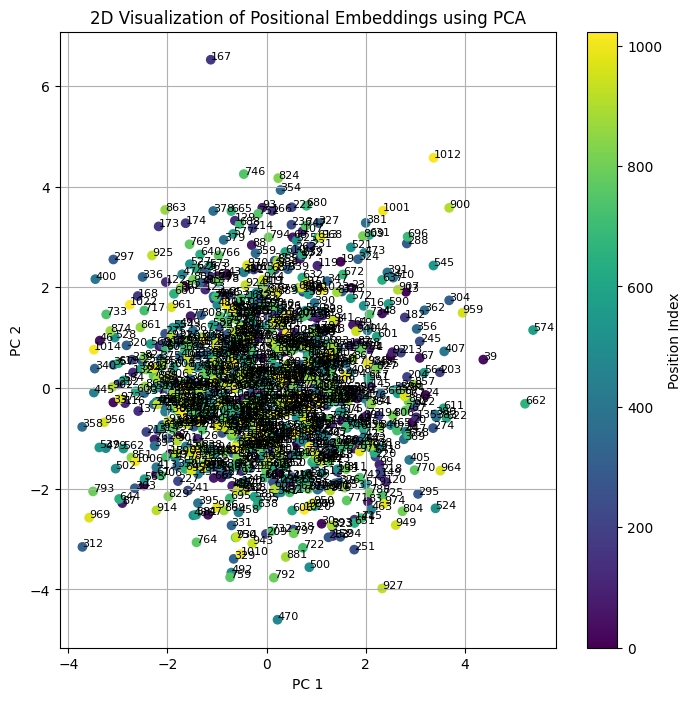

In [19]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Parameters for embedding
vocab_size = 5000
output_dim = 256
max_len = 1024  # Maximum context length
context_len = max_len

# Define token embedding and positional embedding layers
token_embedding = nn.Embedding(vocab_size, output_dim)
pos_embedding_layer = nn.Embedding(context_len, output_dim)

# Get positional embeddings for each position in the context
positions = torch.arange(0, context_len)  # Positions from 0 to max_len
positional_embeddings = pos_embedding_layer(positions)  # Get positional embeddings

# Convert positional embeddings to numpy for visualization
positional_embeddings_np = positional_embeddings.detach().numpy()

# Use PCA to reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
positional_embeddings_2d = pca.fit_transform(positional_embeddings_np)

# Plot the 2D positional embeddings
plt.figure(figsize=(8, 8))
plt.scatter(positional_embeddings_2d[:, 0], positional_embeddings_2d[:, 1], c=positions, cmap='viridis')

# Annotate the plot with the position index
for i, position in enumerate(positions):
    plt.text(positional_embeddings_2d[i, 0], positional_embeddings_2d[i, 1], str(position.item()), fontsize=8)

plt.colorbar(label='Position Index')
plt.title('2D Visualization of Positional Embeddings using PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid(True)
plt.show()


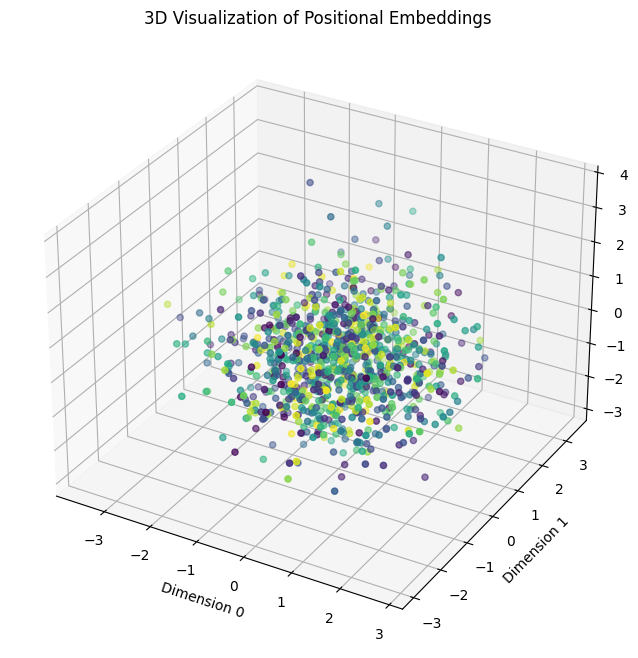

In [20]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters for embedding
vocab_size = 5000
output_dim = 256  # Original embedding dimension
max_len = 1024  # Maximum context length
context_len = max_len

# Define positional embedding layer
pos_embedding_layer = nn.Embedding(context_len, output_dim)

# Get positional embeddings for each position in the context
positions = torch.arange(0, context_len)  # Positions from 0 to max_len
positional_embeddings = pos_embedding_layer(positions)  # Get positional embeddings

# Convert positional embeddings to numpy for visualization
positional_embeddings_np = positional_embeddings.detach().numpy()

# Select three dimensions to plot
dim_x, dim_y, dim_z = 0, 1, 2  # Choose three dimensions of the embeddings

# Plot the positional embeddings in 3D for selected dimensions
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the positional embeddings for the selected dimensions
ax.scatter(
    positional_embeddings_np[:, dim_x], 
    positional_embeddings_np[:, dim_y], 
    positional_embeddings_np[:, dim_z], 
    c=positions.numpy(), cmap='viridis'
)

# Set labels
ax.set_xlabel(f'Dimension {dim_x}')
ax.set_ylabel(f'Dimension {dim_y}')
ax.set_zlabel(f'Dimension {dim_z}')

# Title and show plot
plt.title('3D Visualization of Positional Embeddings')
plt.show()


In [29]:
max_length =4
dataloader = create_dataloader(text)


In [31]:
sw = iter(dataloader)
print(sw)
ns = next(sw)
ns

[tensor([[  286,   616,  4286,   705,  1014,   510,    26,   475,   314,   836,
            470,   892,   286,   326,    11,  1770,    13,  8759,  2763,   438,
           1169,  2994,   284,   943, 17034,   318,   477,   314,   892,   286,
            526,   383,  1573,    11,   319,  9074,    13,   536,  5469,   338,
          11914,    11, 33096,   663,  4808,  3808,    62,   355,   996,   484,
            547, 12548,   287,   281, 13079,   410, 12523,   286, 22353,    13,
            843,   340,   373,   407,   691,   262,  9074,    13,   536, 48819,
            508, 25722,   276,    13, 11161,   407,   262, 40123, 18113,   544,
           9325,   701,    11,   379,   262,   938,   402,  1617,   261, 12917,
            905,    11,  5025,   502,   878,   402,   271, 10899,   338,   366,
          31640,    12,    67, 20811,     1,   284,   910,    11,   351, 10953,
            287,   607,  2951,    25,   366,  1135,  2236,   407,   804,  2402,
            663,   588,   757, 13984,   

In [35]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# Define parameters
vocab_size = 5000  # Vocabulary size
output_dim = 256  # Embedding output dimension
max_len = 1024  # Max sequence length
batch_size = 32  # Example batch size

# Example dummy dataset with random inputs
# Assuming the input data represents token indices from 0 to vocab_size-1
data = torch.randint(0, vocab_size, (batch_size, max_len))
labels = torch.randint(0, vocab_size, (batch_size,))  # Dummy labels

# Create a simple DataLoader to iterate over batches
dataloader = DataLoader(list(zip(data, labels)), batch_size=batch_size)

# Token and positional embeddings
token_embedding_layer = nn.Embedding(vocab_size, output_dim)
pos_embedding_layer = nn.Embedding(max_len, output_dim)

# Iterate over the DataLoader
for batch in dataloader:
    x, y = batch

    # Check if any input index is out of range for the token embedding layer
    if torch.max(x) >= vocab_size:
        print(f"Error: Input contains index {torch.max(x)} greater than vocab_size-1 = {vocab_size-1}")
        
        # Clamp the input to be within the valid range [0, vocab_size-1]
        x = torch.clamp(x, min=0, max=vocab_size-1)
    
    # Get the token embeddings
    token_embeddings = token_embedding_layer(x)
    
    # Generate positional embeddings for the sequence length
    pos_indices = torch.arange(max_len, device=x.device).unsqueeze(0)  # Shape (1, max_len)
    pos_embeddings = pos_embedding_layer(pos_indices)

    # Add token embeddings and positional embeddings
    input_embeddings = token_embeddings + pos_embeddings

    # Break after the first batch (just for demonstration)
    break

# Print the resulting embeddings and their shape
print("Input Embeddings:", input_embeddings)
print("Input Embeddings Shape:", input_embeddings.shape)


Input Embeddings: tensor([[[ 0.5413, -0.4910,  1.5022,  ..., -0.8797,  1.9663, -0.5612],
         [ 1.1295,  0.5011,  1.2249,  ..., -0.7088,  0.7996, -0.4084],
         [-0.3416,  0.7438,  0.6198,  ...,  1.3719, -1.2676, -1.1087],
         ...,
         [ 1.5581,  1.2808, -0.8803,  ...,  2.9898, -2.7553,  0.1894],
         [-1.7790,  0.5543, -2.6196,  ..., -1.1465, -0.5047, -0.6295],
         [-2.0751, -1.1104,  1.1096,  ...,  1.2889,  0.0565,  0.5401]],

        [[ 1.7891, -3.2923,  1.0769,  ...,  0.6161,  1.3400,  0.6931],
         [ 0.1502,  2.4210,  0.9348,  ...,  0.1576,  0.8753, -0.7300],
         [-1.1161,  1.2434, -1.2111,  ...,  1.8087, -0.4120,  0.7545],
         ...,
         [ 2.6801,  2.8664,  1.3843,  ...,  3.3737, -0.1195, -0.2102],
         [ 0.1455,  2.3561, -0.9768,  ...,  0.9836, -0.7009, -1.0475],
         [ 0.6491, -2.4813, -0.2321,  ...,  1.1968, -2.0462, -0.9106]],

        [[ 1.8325,  0.5630,  0.9613,  ...,  0.2420,  0.8847,  2.4615],
         [ 0.9973,  0.4737,

In [45]:
tokenizer = tiktoken.get_encoding("gpt2")
encoded_text = tokenizer.encode(text)

vocab_size = 50257
output_dim = 256
max_len = 1024
context_length = max_len


token_embedding_layer = nn.Embedding(vocab_size, output_dim)
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)

max_length = 4
dataloader = create_dataloader(text, batch_size=8, max_length=max_length, stride=max_length)

In [46]:
for batch in dataloader:
    x, y = batch

    token_embeddings = token_embedding_layer(x)
    pos_embeddings = pos_embedding_layer(torch.arange(max_length))

    input_embeddings = token_embeddings + pos_embeddings

    break

In [47]:
input_embeddings

tensor([[[-2.3465e-01, -2.5676e+00, -6.0847e-01,  ..., -3.2174e-01,
          -1.1679e+00,  2.4189e+00],
         [-2.6199e+00, -2.9409e+00,  2.2851e+00,  ..., -1.7452e+00,
          -5.2630e-01,  2.3707e-01],
         [-1.4874e+00,  5.2003e-02,  1.4274e+00,  ..., -1.2389e+00,
           4.6065e-01, -4.6465e-01],
         [-1.1851e-01,  1.8301e+00,  1.1034e+00,  ..., -1.2114e+00,
           8.2809e-01, -1.4242e+00]],

        [[-1.0474e-01, -2.6776e+00, -8.7499e-01,  ...,  1.1217e+00,
           2.1929e+00,  8.1409e-01],
         [-2.5999e+00, -1.7300e+00, -1.7039e+00,  ..., -9.3503e-01,
           1.3729e+00, -8.7750e-02],
         [-8.0759e-01, -1.4375e+00,  8.9548e-01,  ..., -1.3821e+00,
           2.3885e+00, -3.6428e-01],
         [ 1.1818e+00,  8.6101e-01, -3.8355e-01,  ..., -1.5038e+00,
           2.8177e+00, -2.3635e-01]],

        [[ 3.2949e-01, -1.6461e+00, -6.2571e-01,  ...,  3.0382e+00,
          -5.4056e-01,  2.4024e+00],
         [-1.6641e+00, -1.6021e+00,  9.4728e-01,  .

## Multi head

In [48]:
class CausalSelfAttention(nn.Module):

    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout) # New
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1)) # New

    def forward(self, x):
        b, n_tokens, d_in = x.shape # New batch dimension b
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.transpose(1, 2) # Changed transpose
        attn_scores.masked_fill_(  # New, _ ops are in-place
            self.mask.bool()[:n_tokens, :n_tokens], -torch.inf) 
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights) # New

        context_vec = attn_weights @ values
        return context_vec


class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalSelfAttention(d_in, d_out, context_length, dropout, qkv_bias) 
             for _ in range(num_heads)]
        )
        self.out_proj = nn.Linear(d_out*num_heads, d_out*num_heads)

    def forward(self, x):
        context_vec = torch.cat([head(x) for head in self.heads], dim=-1)
        return self.out_proj(context_vec)

In [49]:
input_embeddings

tensor([[[-2.3465e-01, -2.5676e+00, -6.0847e-01,  ..., -3.2174e-01,
          -1.1679e+00,  2.4189e+00],
         [-2.6199e+00, -2.9409e+00,  2.2851e+00,  ..., -1.7452e+00,
          -5.2630e-01,  2.3707e-01],
         [-1.4874e+00,  5.2003e-02,  1.4274e+00,  ..., -1.2389e+00,
           4.6065e-01, -4.6465e-01],
         [-1.1851e-01,  1.8301e+00,  1.1034e+00,  ..., -1.2114e+00,
           8.2809e-01, -1.4242e+00]],

        [[-1.0474e-01, -2.6776e+00, -8.7499e-01,  ...,  1.1217e+00,
           2.1929e+00,  8.1409e-01],
         [-2.5999e+00, -1.7300e+00, -1.7039e+00,  ..., -9.3503e-01,
           1.3729e+00, -8.7750e-02],
         [-8.0759e-01, -1.4375e+00,  8.9548e-01,  ..., -1.3821e+00,
           2.3885e+00, -3.6428e-01],
         [ 1.1818e+00,  8.6101e-01, -3.8355e-01,  ..., -1.5038e+00,
           2.8177e+00, -2.3635e-01]],

        [[ 3.2949e-01, -1.6461e+00, -6.2571e-01,  ...,  3.0382e+00,
          -5.4056e-01,  2.4024e+00],
         [-1.6641e+00, -1.6021e+00,  9.4728e-01,  .

In [50]:
torch.manual_seed(123)

context_length = max_length
d_in = output_dim

num_heads=2
d_out = d_in // num_heads

mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads)

batch = input_embeddings
context_vecs = mha(batch)

print("context_vecs.shape:", context_vecs.shape)

context_vecs.shape: torch.Size([8, 4, 256])


In [51]:
context_vecs

tensor([[[-0.1608, -0.5078,  0.1718,  ..., -0.4419,  0.6140, -0.4829],
         [ 0.1790,  0.0317,  0.5894,  ..., -0.3223,  0.3762, -0.2170],
         [ 0.2453, -0.0770,  0.1174,  ..., -0.1222,  0.7445, -0.0283],
         [ 0.0312, -0.4123,  0.4359,  ..., -0.3284,  0.5811, -0.3063]],

        [[ 0.0069, -0.1199,  0.0816,  ...,  0.0188, -0.5669, -0.2321],
         [-0.2646,  0.0086,  0.1082,  ..., -0.5758, -0.1331,  0.1287],
         [-0.0766, -0.4943,  0.3183,  ..., -0.2163, -0.1262, -0.2009],
         [-0.0492, -0.1509, -0.0331,  ..., -0.1744, -0.0250, -0.0659]],

        [[-0.2516, -0.2433,  0.9968,  ...,  0.0896, -0.2395, -0.0937],
         [-0.1936,  0.4816,  0.5811,  ...,  0.0084,  0.0570,  0.0502],
         [-0.2458,  0.1650,  0.3559,  ...,  0.1168,  0.3446,  0.1069],
         [-0.4223, -0.4629,  0.0640,  ..., -0.3022,  0.4164, -0.0462]],

        ...,

        [[-0.1608, -0.5078,  0.1718,  ..., -0.4419,  0.6140, -0.4829],
         [-0.0967, -0.2870,  0.1016,  ..., -0.4381,  0.16